In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [10]:
pulls = pd.read_csv('/Users/OliverSmirnov/Downloads/Data/Raw/pulls.csv')
wish_total = pd.read_csv('/Users/OliverSmirnov/Downloads/Data/Raw/wish_total.csv')
#wishes = pd.read_csv('/Users/OliverSmirnov/Downloads/Data/Raw/wishes.csv')

In [18]:
pulls

,id,time,name,pity,type,grouped,wishId,bannerId,guaranteed,rarity
0,160226106,2021-12-07 20:31:57+00,sucrose,5,character,t,33126977,100001,f,4
1,160253216,2021-11-02 22:22:11+00,diona,8,character,f,33130214,300021,f,4
2,160253217,2021-11-02 22:22:15+00,thoma,9,character,f,33130214,300021,t,4
3,160253218,2021-11-02 22:22:18+00,thoma,10,character,f,33130214,300021,f,4
4,160253219,2021-11-02 22:30:23+00,diona,10,character,f,33130214,300021,t,4
...,...,...,...,...,...,...,...,...,...,...
1321262,159066198,2021-11-02 19:50:00+00,mouuns_moon,5,weapon,f,32986612,400020,f,4
1321263,159066199,2021-11-02 19:50:14+00,wavebreakers_fin,8,weapon,t,32986612,400020,t,4
1321264,159066200,2021-11-02 19:51:53+00,the_widsith,8,weapon,f,32986612,400020,f,4
1321265,159066201,2021-11-03 11:00:03+00,mouuns_moon,7,weapon,t,32986612,400020,t,4


In [19]:
wish_total

,uniqueId,total,bannerType,legendary,rare,legendaryPercentage,rarePercentage
0,5524c5c4,20,beginners,0,3,0.000000,0.150000
1,5524c5c4,10,standard,0,1,0.000000,0.100000
2,6d523ee9,20,beginners,0,3,0.000000,0.150000
3,6d523ee9,189,character-event,2,23,0.010582,0.121693
4,6681f038,45,standard,2,6,0.044444,0.133333
...,...,...,...,...,...,...,...
113620,13e1e513,2,weapon-event,0,0,0.000000,0.000000
113621,58091ab6,20,beginners,0,3,0.000000,0.150000
113622,58091ab6,205,standard,4,28,0.019512,0.136585
113623,6ae7da2e,137,standard,2,19,0.014599,0.138686


Text(0.5, 1.0, 'Character Event Banners')

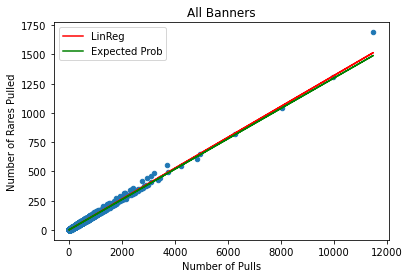

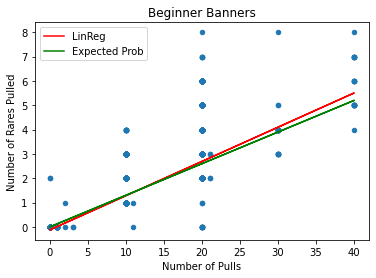

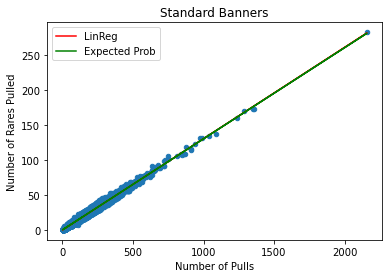

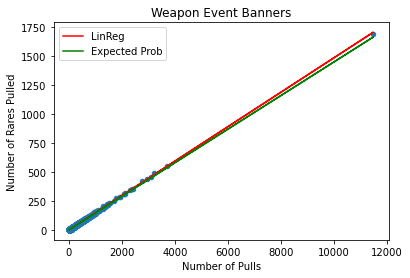

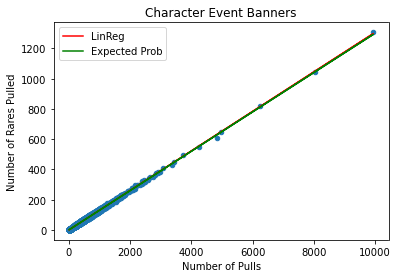

In [79]:
#Plotting total pulls vs number of rares (4 star) pulled
all_plot = wish_total.plot.scatter(x='total',y='rare')
X = np.array(wish_total['total'])
Y = np.array(wish_total['rare'])
a, b = np.polyfit(X, Y, 1)
plt.plot(X, a*X+b, color='r', label='LinReg')
plt.plot(X, 0.13*X, color='g', label='Expected Prob')
plt.xlabel("Number of Pulls")
plt.ylabel("Number of Rares Pulled")
plt.legend(loc='upper left')
plt.title('All Banners')

#Plotting total pulls vs number of rares (4 star) pulled for beginner banners
wt_beg = wish_total.loc[(wish_total['bannerType']=='beginners')]
beg_plot = wt_beg.plot.scatter(x='total',y='rare')
X = np.array(wt_beg['total'])
Y = np.array(wt_beg['rare'])
a, b = np.polyfit(X, Y, 1)
plt.plot(X, a*X+b, color='r', label='LinReg')
plt.plot(X, 0.13*X, color='g', label='Expected Prob')
plt.xlabel("Number of Pulls")
plt.ylabel("Number of Rares Pulled")
plt.legend(loc='upper left')
plt.title('Beginner Banners')

#Plotting total pulls vs number of rares (4 star) pulled for standard banners
wt_stan = wish_total.loc[(wish_total['bannerType']=='standard')]
stan_plot = wt_stan.plot.scatter(x='total',y='rare')
X = np.array(wt_stan['total'])
Y = np.array(wt_stan['rare'])
a, b = np.polyfit(X, Y, 1)
plt.plot(X, a*X+b, color='r', label='LinReg')
plt.plot(X, 0.13*X, color='g', label='Expected Prob')
plt.xlabel("Number of Pulls")
plt.ylabel("Number of Rares Pulled")
plt.legend(loc='upper left')
plt.title('Standard Banners')

#Plotting total pulls vs number of rares (4 star) pulled for weapon event banners
wt_wep = wish_total.loc[(wish_total['bannerType']=='weapon-event')]
wep_plot = wt_wep.plot.scatter(x='total',y='rare')
X = np.array(wt_wep['total'])
Y = np.array(wt_wep['rare'])
a, b = np.polyfit(X, Y, 1)
plt.plot(X, a*X+b, color='r', label='LinReg')
plt.plot(X, 0.145*X, color='g', label='Expected Prob') #prob slightly different for weapons; check wiki
plt.xlabel("Number of Pulls")
plt.ylabel("Number of Rares Pulled")
plt.legend(loc='upper left')
plt.title('Weapon Event Banners')

#Plotting total pulls vs number of rares (4 star) pulled for character event banners
wt_char = wish_total.loc[(wish_total['bannerType']=='character-event')]
char_plot = wt_char.plot.scatter(x='total',y='rare')
X = np.array(wt_char['total'])
Y = np.array(wt_char['rare'])
a, b = np.polyfit(X, Y, 1)
plt.plot(X, a*X+b, color='r', label='LinReg')
plt.plot(X, 0.13*X, color='g', label='Expected Prob')
plt.xlabel("Number of Pulls")
plt.ylabel("Number of Rares Pulled")
plt.legend(loc='upper left')
plt.title('Character Event Banners')

Text(0.5, 1.0, 'Character Event Banners')

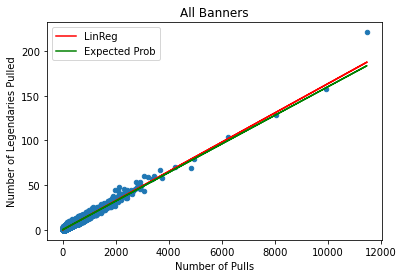

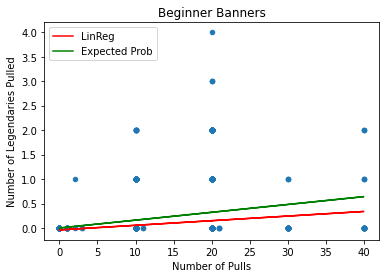

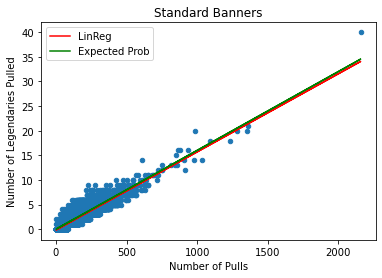

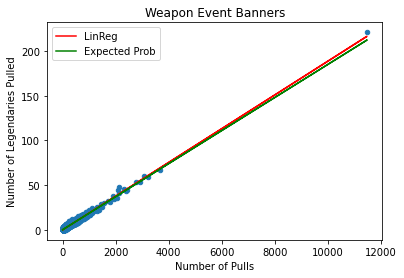

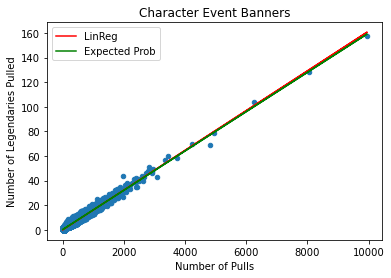

In [78]:
#Plotting total pulls vs number of legendaries (5 star) pulled
all_plot = wish_total.plot.scatter(x='total',y='legendary')
X = np.array(wish_total['total'])
Y = np.array(wish_total['legendary'])
a, b = np.polyfit(X, Y, 1)
plt.plot(X, a*X+b, color='r', label='LinReg')
plt.plot(X, 0.016*X, color='g', label='Expected Prob')
plt.xlabel("Number of Pulls")
plt.ylabel("Number of Legendaries Pulled")
plt.legend(loc='upper left')
plt.title('All Banners')

#Plotting total pulls vs number of legendaries (5 star) pulled for beginner banners
wt_beg = wish_total.loc[(wish_total['bannerType']=='beginners')]
beg_plot = wt_beg.plot.scatter(x='total',y='legendary')
X = np.array(wt_beg['total'])
Y = np.array(wt_beg['legendary'])
a, b = np.polyfit(X, Y, 1)
plt.plot(X, a*X+b, color='r', label='LinReg')
plt.plot(X, 0.016*X, color='g', label='Expected Prob')
plt.xlabel("Number of Pulls")
plt.ylabel("Number of Legendaries Pulled")
plt.legend(loc='upper left')
plt.title('Beginner Banners')

#Plotting total pulls vs number of legendaries (5 star) pulled for standard banners
wt_stan = wish_total.loc[(wish_total['bannerType']=='standard')]
stan_plot = wt_stan.plot.scatter(x='total',y='legendary')
X = np.array(wt_stan['total'])
Y = np.array(wt_stan['legendary'])
a, b = np.polyfit(X, Y, 1)
plt.plot(X, a*X+b, color='r', label='LinReg')
plt.plot(X, 0.016*X, color='g', label='Expected Prob')
plt.xlabel("Number of Pulls")
plt.ylabel("Number of Legendaries Pulled")
plt.legend(loc='upper left')
plt.title('Standard Banners')

#Plotting total pulls vs number of legendaries (5 star) pulled for weapon event banners
wt_wep = wish_total.loc[(wish_total['bannerType']=='weapon-event')]
wep_plot = wt_wep.plot.scatter(x='total',y='legendary')
X = np.array(wt_wep['total'])
Y = np.array(wt_wep['legendary'])
a, b = np.polyfit(X, Y, 1)
plt.plot(X, a*X+b, color='r', label='LinReg')
plt.plot(X, 0.0185*X, color='g', label='Expected Prob') #prob slightly different for weapons; check wiki
plt.xlabel("Number of Pulls")
plt.ylabel("Number of Legendaries Pulled")
plt.legend(loc='upper left')
plt.title('Weapon Event Banners')

#Plotting total pulls vs number of legendaries (5 star) pulled for character event banners
wt_char = wish_total.loc[(wish_total['bannerType']=='character-event')]
char_plot = wt_char.plot.scatter(x='total',y='legendary')
X = np.array(wt_char['total'])
Y = np.array(wt_char['legendary'])
a, b = np.polyfit(X, Y, 1)
plt.plot(X, a*X+b, color='r', label='LinReg')
plt.plot(X, 0.016*X, color='g', label='Expected Prob')
plt.xlabel("Number of Pulls")
plt.ylabel("Number of Legendaries Pulled")
plt.legend(loc='upper left')
plt.title('Character Event Banners')